# Different Pretrained Semantic Analysis Models

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

First, we need to import the journal dataset.

In [8]:
journals_df = pd.read_csv('journal_data.csv')
journals_df.head()

,Answer,Answer.f1.afraid.raw,Answer.f1.angry.raw,Answer.f1.anxious.raw,Answer.f1.ashamed.raw,Answer.f1.awkward.raw,Answer.f1.bored.raw,Answer.f1.calm.raw,Answer.f1.confused.raw,Answer.f1.disgusted.raw,...,Answer.t1.family.raw,Answer.t1.food.raw,Answer.t1.friends.raw,Answer.t1.god.raw,Answer.t1.health.raw,Answer.t1.love.raw,Answer.t1.recreation.raw,Answer.t1.school.raw,Answer.t1.sleep.raw,Answer.t1.work.raw
0,"My family was the most salient part of my day,...",False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,Yoga keeps me focused. I am able to take some ...,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,"Yesterday, my family and I played a bunch of b...",False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
3,"Yesterday, I visited my parents and had dinner...",False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
4,"Yesterday, I really felt the importance of my ...",False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


Let's see an example of a journal entry.

In [9]:
journals_df['Answer'][0]

'My family was the most salient part of my day, since most days the care of my 2 children occupies the majority of my time. They are 2 years old and 7 months and I love them, but they also require so much attention that my anxiety is higher than ever. I am often overwhelmed by the care the require, but at the same, I am so excited to see them hit developmental and social milestones.'

For now, we are only concerned about the text of the entries.

In [10]:
text_entries = journals_df['Answer']
text_entries.head()

0    My family was the most salient part of my day,...
1    Yoga keeps me focused. I am able to take some ...
2    Yesterday, my family and I played a bunch of b...
3    Yesterday, I visited my parents and had dinner...
4    Yesterday, I really felt the importance of my ...
Name: Answer, dtype: object

## Textblob

It is a simple python library that offers API access to different NLP tasks such as sentiment analysis, spelling correction, etc.

Textblob sentiment analyzer returns two properties for a given input sentence: 

Polarity is a float that lies between [-1,1], -1 indicates negative sentiment and +1 indicates positive sentiments. 
Subjectivity is also a float which lies in the range of [0,1]. Subjective sentences generally refer to personal opinion, emotion, or judgment. 


In [11]:
from textblob import TextBlob

In [12]:
testimonial = TextBlob("The food was great!")
testimonial.sentiment

Sentiment(polarity=1.0, subjectivity=0.75)

In [13]:
entry_tb = TextBlob(text_entries[0])
entry_tb.sentiment

Sentiment(polarity=0.27314814814814814, subjectivity=0.3824074074074074)

Let's make a table based off of our journal entries and textblob's sentiment analysis

In [14]:
new_df = []
for entry in text_entries:
    curr = TextBlob(entry)
    new_df.append([entry, curr.polarity, curr.subjectivity, len(entry)])

textblob_df = pd.DataFrame(new_df, columns=['entry', 'polarity', 'subjectivity', 'length'])
textblob_df.head()

,entry,polarity,subjectivity,length
0,"My family was the most salient part of my day,...",0.273148,0.382407,384
1,Yoga keeps me focused. I am able to take some ...,0.366667,0.675000,150
2,"Yesterday, my family and I played a bunch of b...",0.231250,0.562500,248
3,"Yesterday, I visited my parents and had dinner...",0.400000,0.550000,149
4,"Yesterday, I really felt the importance of my ...",0.314286,0.442857,333


##### Visualize

Let's plot the polarity to see if there's more positive, negative, or neutral entries based on the TextBlob sentiment analysis.

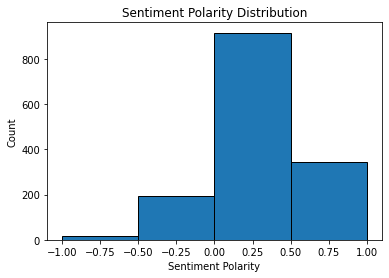

In [15]:
plt.hist(textblob_df['polarity'], bins=[-1, -0.5, 0, 0.5, 1], edgecolor='k')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.title('Sentiment Polarity Distribution')
plt.show()


From the length, we can see the longer the entry, the more neutral sentiment determinations we get. This could be because the more words in the entry, the harder it is for the model to make an accurate determination, therefore just placing it in the neutral category.

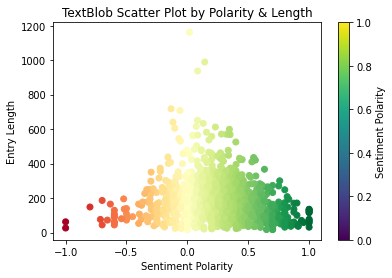

In [16]:
polarities = textblob_df['polarity']

# Define a custom normalization function to map -1 to 0, 0 to 0.5, and 1 to 1
def custom_normalize(x):
    if x < 0:
        return 0.5 * (x + 1)
    else:
        return 0.5 * x + 0.5

# Apply the custom normalization function to the polarities
normalized_polarities = polarities.apply(custom_normalize)

# Create a colormap that ranges from 0 to 1 (which corresponds to -1 to 1)
colors = plt.cm.RdYlGn(normalized_polarities)

plt.scatter(textblob_df['polarity'], textblob_df['length'], c=colors)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Entry Length')
plt.title('TextBlob Scatter Plot by Polarity & Length')
plt.colorbar(label='Sentiment Polarity')
plt.show()


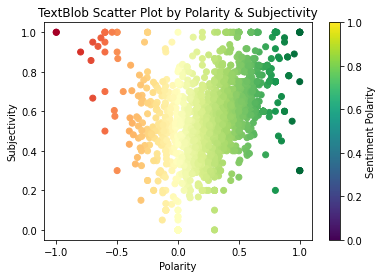

In [17]:
polarities = textblob_df['polarity']

# Define a custom normalization function to map -1 to 0, 0 to 0.5, and 1 to 1
def custom_normalize(x):
    if x < 0:
        return 0.5 * (x + 1)
    else:
        return 0.5 * x + 0.5

# Apply the custom normalization function to the polarities
normalized_polarities = polarities.apply(custom_normalize)

# Create a colormap that ranges from 0 to 1 (which corresponds to -1 to 1)
colors = plt.cm.RdYlGn(normalized_polarities)

plt.scatter(textblob_df['polarity'], textblob_df['subjectivity'], c=colors)  # Replace 'some_other_variable' with your data
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('TextBlob Scatter Plot by Polarity & Subjectivity')
plt.colorbar(label='Sentiment Polarity')
plt.show()

### VADER Sentiment

[Valence aware dictionary for sentiment reasoning (VADER)](https://pypi.org/project/vaderSentiment/) is another popular rule-based sentiment analyzer. 

It uses a list of lexical features (e.g. word) which are labeled as positive or negative according to their semantic orientation to calculate the text sentiment.   

Vader sentiment returns the probability of a given input sentence to be 

Positive, negative, and neutral. 

For example:

“The food was great!”
Positive : 99%
Negative : 1%
Neutral : 0%

These three probabilities will add up to 100%.

In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [19]:
analyzer = SentimentIntensityAnalyzer()
sentence = "The food was great!"
vs = analyzer.polarity_scores(sentence)
print("{} {}".format(sentence, str(vs)))

The food was great! {'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}


In [21]:
entry = text_entries[0]
vs = analyzer.polarity_scores(entry)
print(str(vs))

{'neg': 0.023, 'neu': 0.79, 'pos': 0.187, 'compound': 0.9224}


Let's make a table based off of our journal entries and vader's sentiment analysis.
To make visualizing data easier, we will just assign a determination based on the highest rated determination.
For example, if the determinations are 2% neutral, 18% negative, and 80% positive, then we will just classify it as positive.

In [29]:
new_df = []
for entry in text_entries:
    curr = analyzer.polarity_scores(entry)
    det = max([curr['neg'], curr['neu'], curr['pos']])
    normalized_det = 0
    final_det = ''
    if det == curr['neg']:
        normalized_det = 0.0
        final_det = 'neg'
    elif det == curr['neu']:
        normalized_det = 0.5
        final_det ='neu'
    else:
        normalized_det = 1
        final_det = 'pos'
    new_df.append([entry, normalized_det, final_det, len(entry), curr['neg'], curr['neu'], curr['pos']])

vader_df = pd.DataFrame(new_df, columns=['entry', 'normalized_polarity', 'sentiment', 'length', 'neg', 'neu', 'pos'])
vader_df.head()

,entry,normalized_polarity,sentiment,length,neg,neu,pos
0,"My family was the most salient part of my day,...",0.5,neu,384,0.023,0.790,0.187
1,Yoga keeps me focused. I am able to take some ...,0.5,neu,150,0.000,0.872,0.128
2,"Yesterday, my family and I played a bunch of b...",0.5,neu,248,0.066,0.628,0.305
3,"Yesterday, I visited my parents and had dinner...",0.5,neu,149,0.000,0.880,0.120
4,"Yesterday, I really felt the importance of my ...",0.5,neu,333,0.110,0.716,0.174


##### Visualize

Let's plot the polarity to see if there's more positive, negative, or neutral entries based on the Vader sentiment analysis.

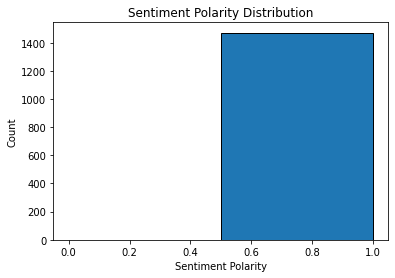

In [33]:
plt.hist(vader_df['normalized_polarity'], bins=[0, 0.5, 1], edgecolor='k')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.title('Sentiment Polarity Distribution')
plt.show()

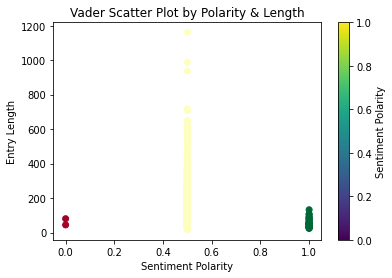

In [35]:
polarities = vader_df['normalized_polarity']

# Create a colormap that ranges from 0 to 1 (which corresponds to -1 to 1)
colors = plt.cm.RdYlGn(polarities)

plt.scatter(vader_df['normalized_polarity'], vader_df['length'], c=colors)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Entry Length')
plt.title('Vader Scatter Plot by Polarity & Length')
plt.colorbar(label='Sentiment Polarity')
plt.show()


From this we can see that nearly all of the VADER determinations have been neutral. This shows that it does not do a good job of making determinations on journal entries, and decyphering between positive and negative. This most likely due to it's training, as Vader is optimized for social media data and can yield good results when used with data from twitter, facebook, etc. Also,  with the rule-based approach for sentiment analysis  the method only cares about individual words and completely ignores the context in which it is used. 

## Flair